14


/home/nanobio/.local/lib/python3.8/site-packages/forgi/graph/bulge_graph.py:348: UserWarning: Original sequence contained T. All occurrences of T/t were replaced by U/u respectively!
  warnings.warn(


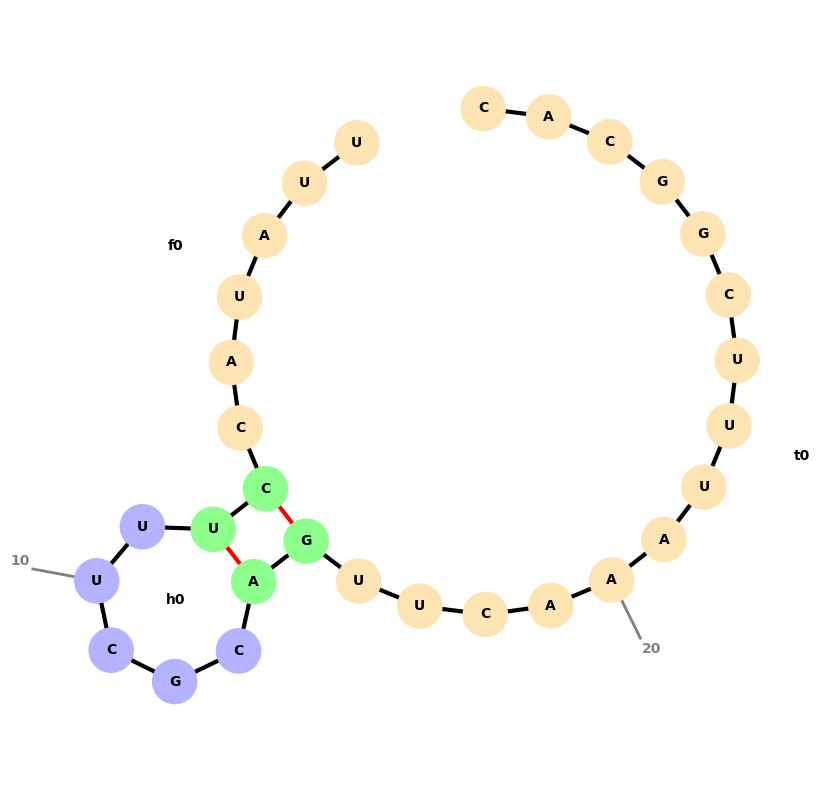

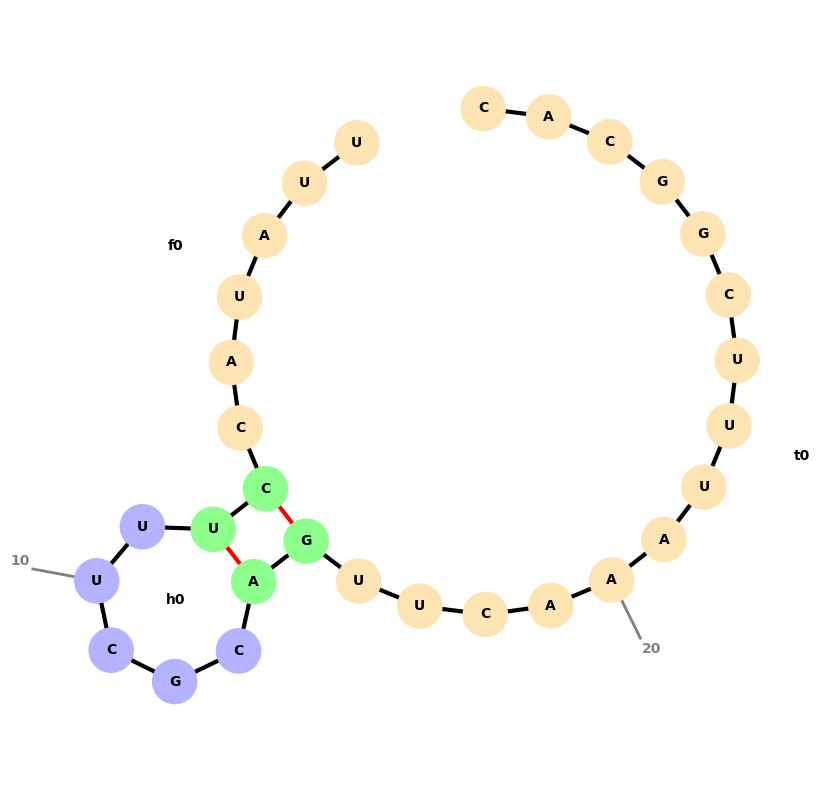

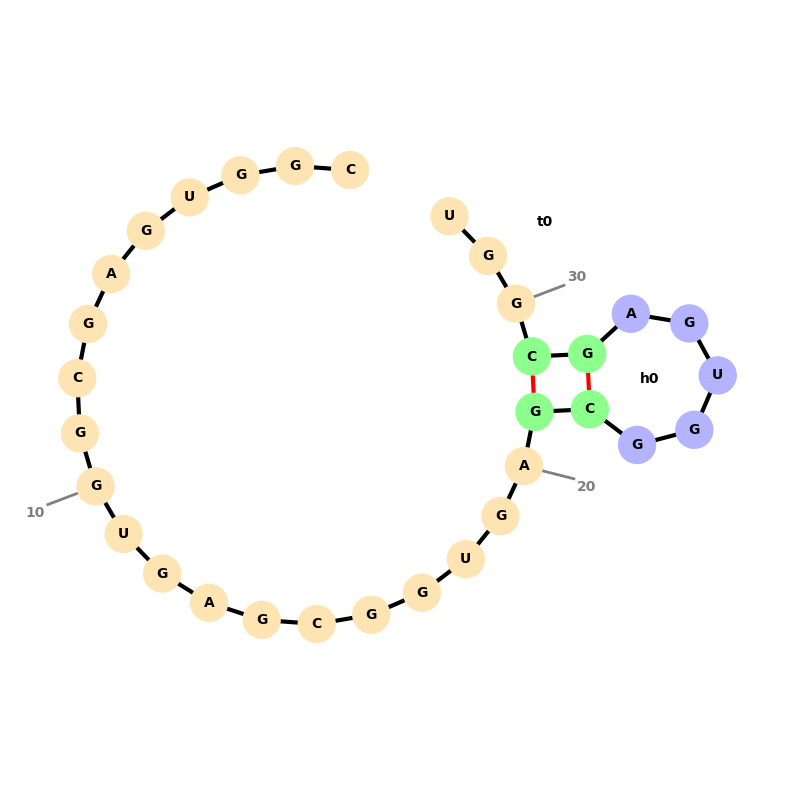

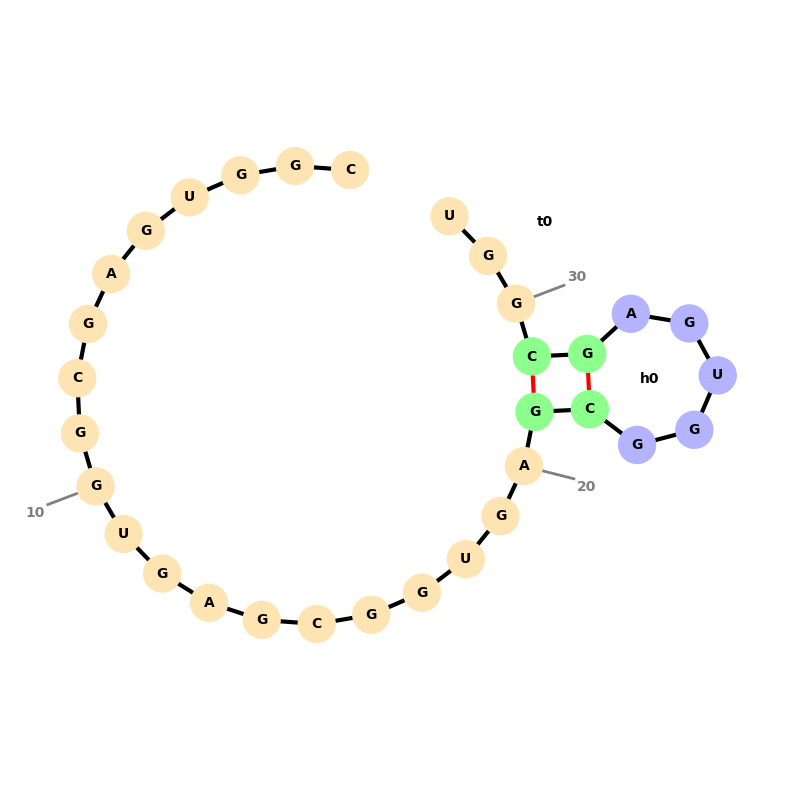

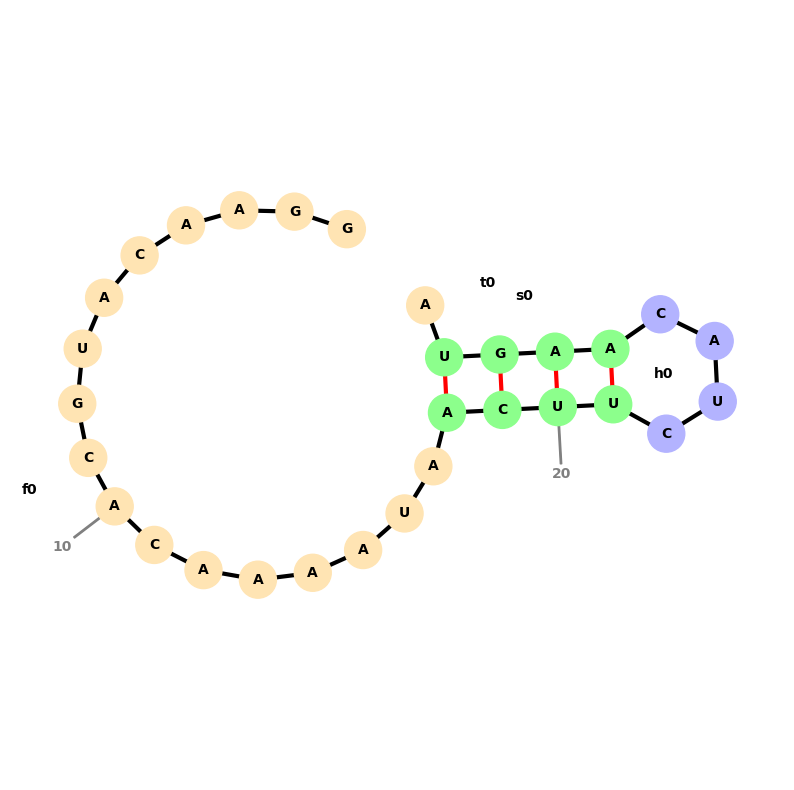

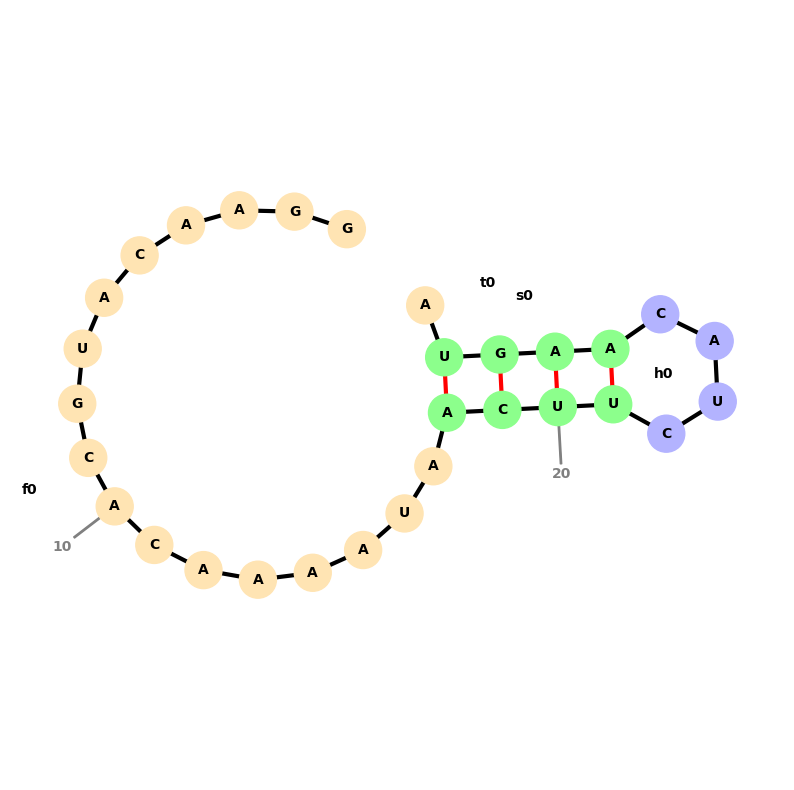

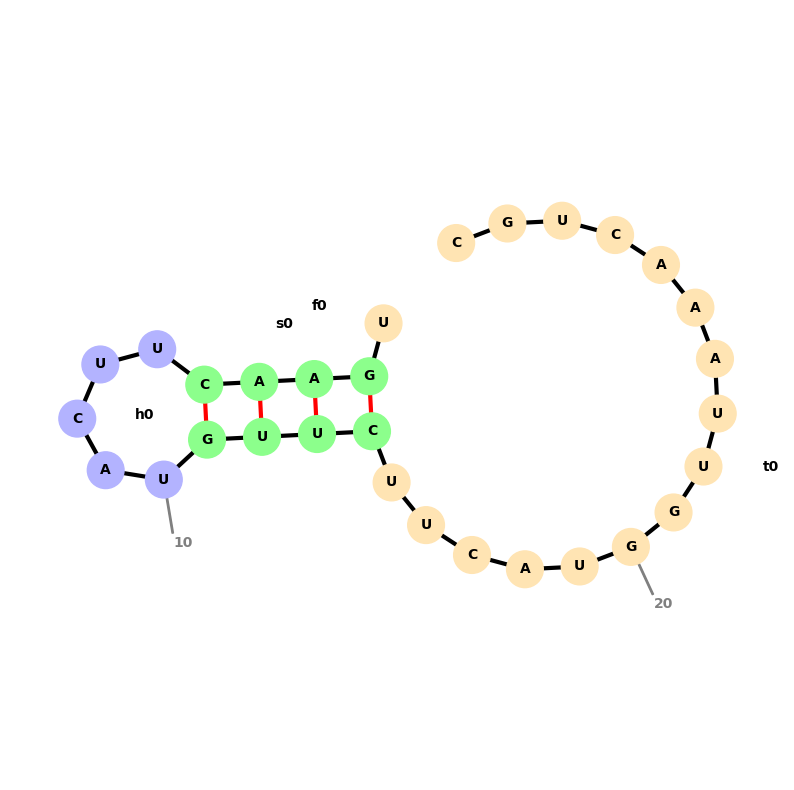

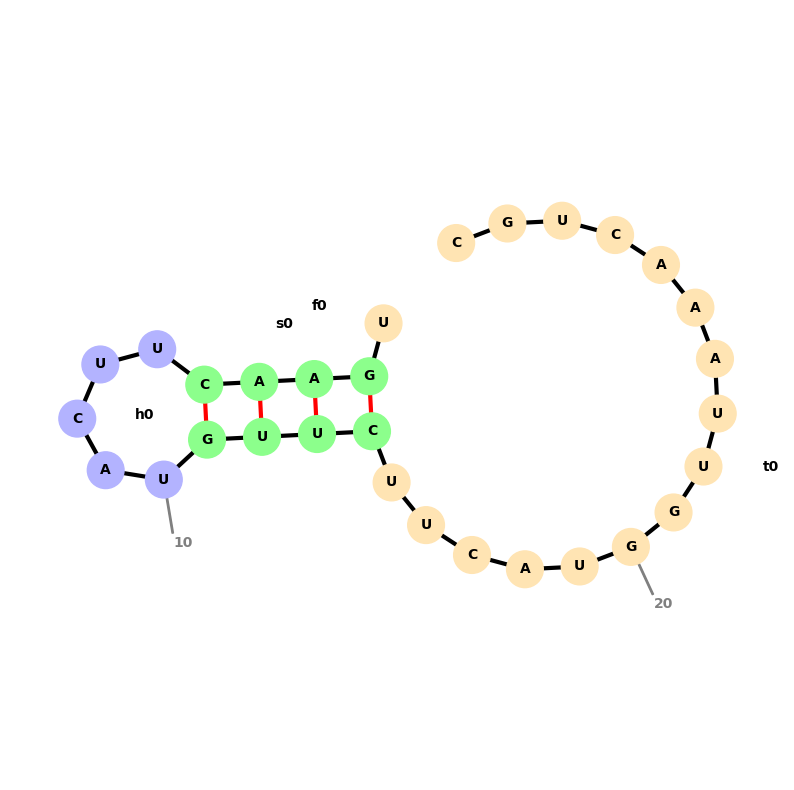

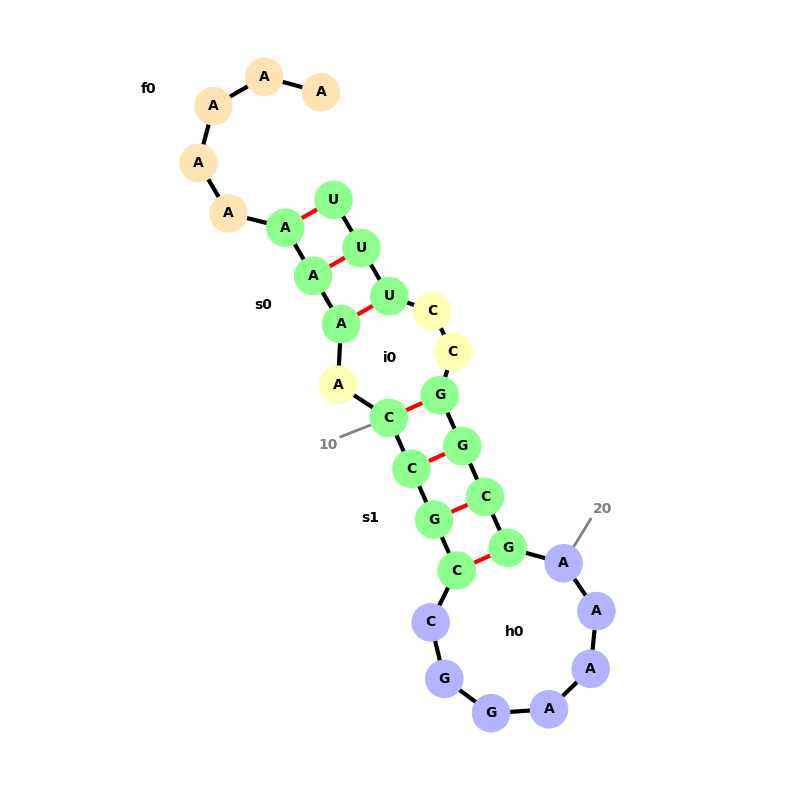

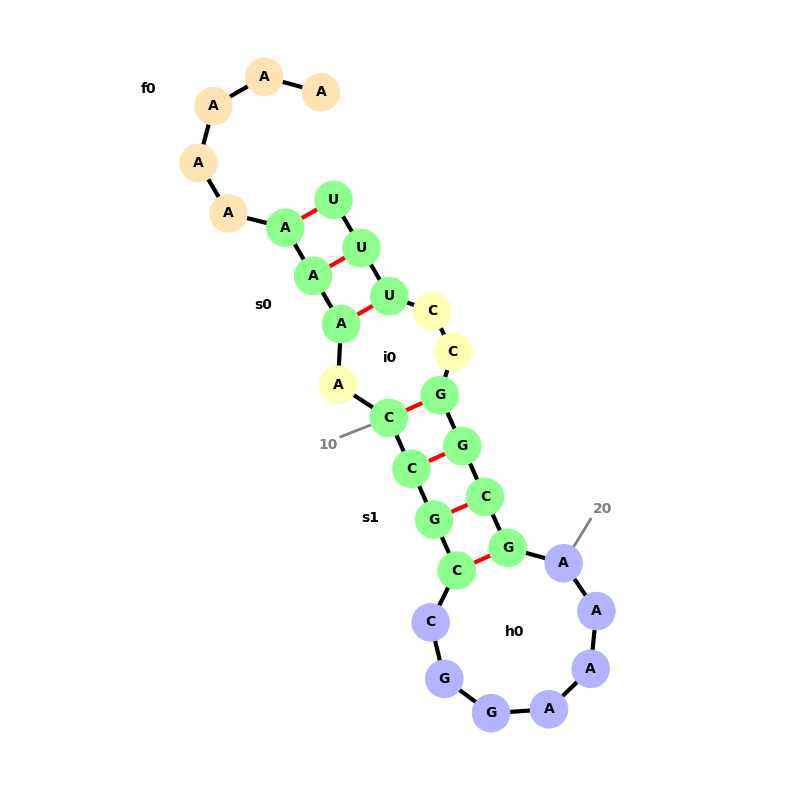

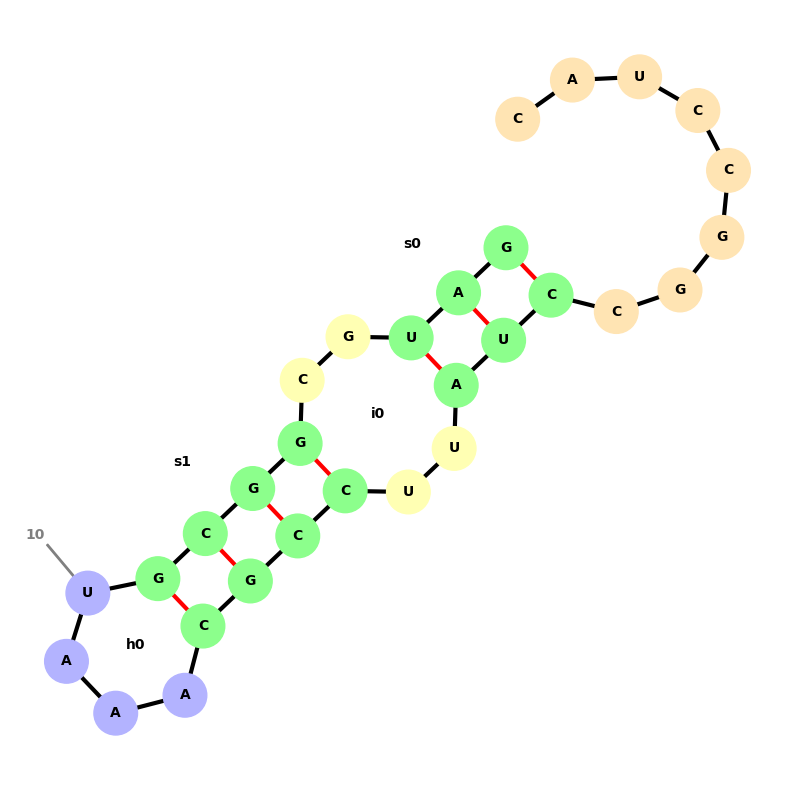

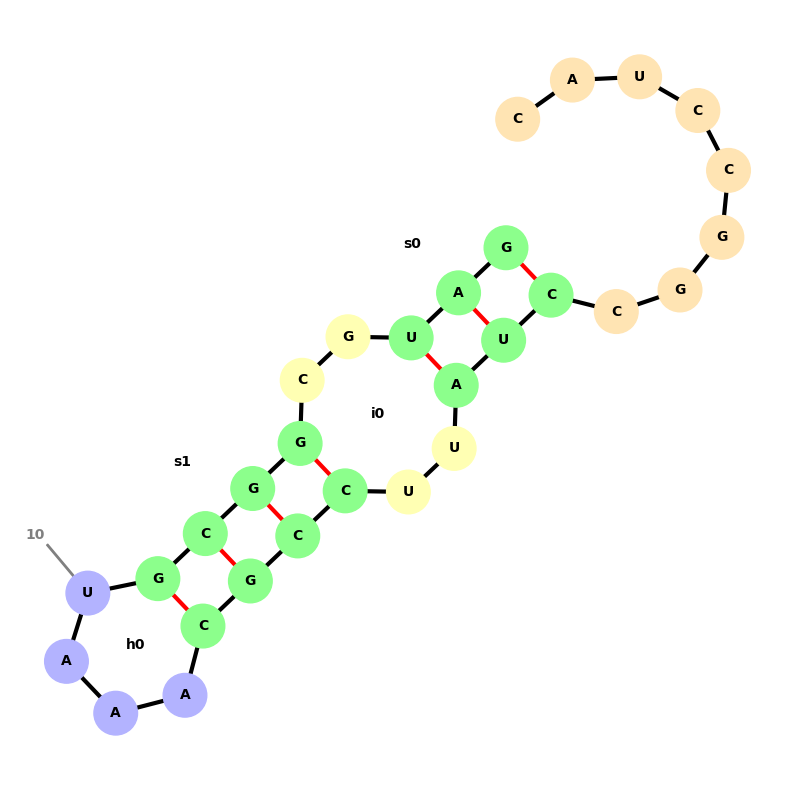

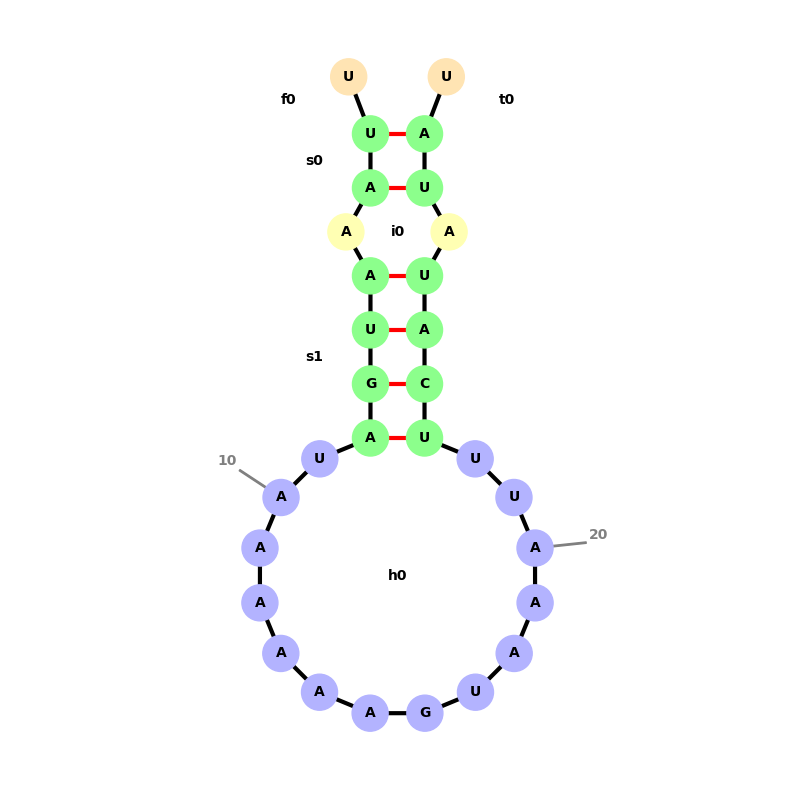

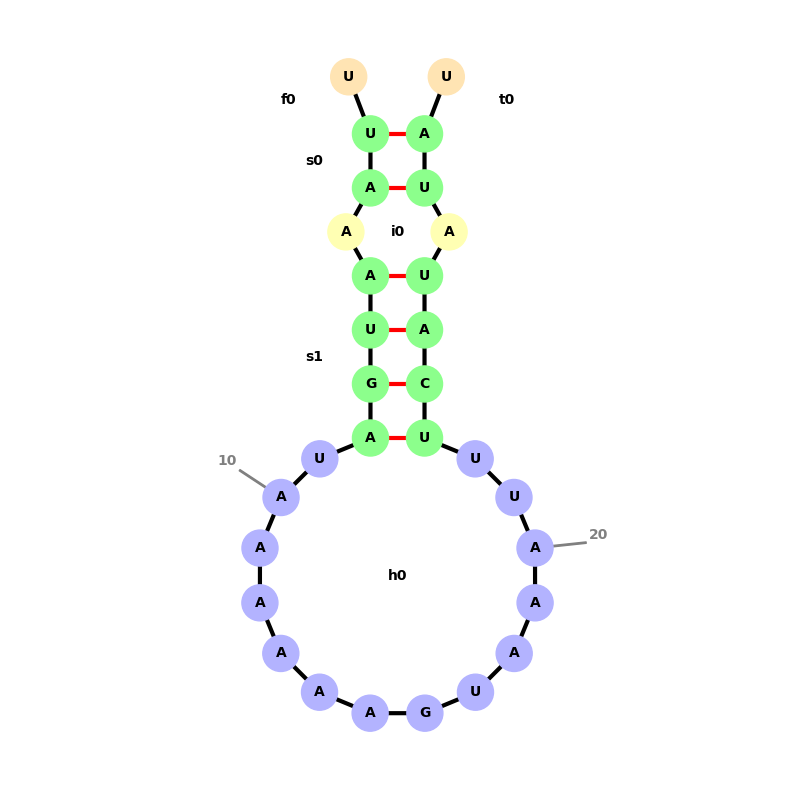

In [1]:
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
import forgi
from seqfold import fold, dg, dg_cache, dot_bracket

######################seqfold######################
file=open("terminator_20ZEcoli.fasta")
cont=file.readlines()
print(len(cont))
for i in range(len(cont)):
    if i%2 == 0:
        seq = str(cont[i+1].replace("\n",""))
        structs = fold(seq)
        name= str(cont[i].split(">")[-1])
        with open (name+".fx","w") as w:
            w.write (">"+name)
            w.write (str(cont[i+1]))
            w.write ((dot_bracket(seq,structs)))
    cg = forgi.load_rna(name+".fx", allow_many=False)
    l=plt.figure(figsize=(10,10))
    fvm.plot_rna(cg, text_kwargs={"fontweight":"black"}, lighten=0.7,
                 backbone_kwargs={"linewidth":3})
    plt.show()
    l.savefig(name+".png",facecolor='white', transparent=False, dpi=300)
with open ("seqfold_prediction.txt","w") as w:
    for i in range(len(cont)):
        if i%2 == 0:
            seq = str(cont[i+1].replace("\n",""))
            structs = fold(seq)
            name= str(cont[i].replace("\n","").split(">")[-1])
            value=str(dg(seq))
            w.write (">"+name+"_"+value+"\n")
            w.write (str(cont[i+1].replace("\n",""))+"\n")
            w.write ((dot_bracket(seq,structs))+"\n")
!rm *.fx